In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
construction_cost = pd.read_csv('../data/construction_cost.csv', index_col=0)
income = pd.read_csv('../data/income.csv', index_col=0)
living_space = pd.read_csv('../data/living_space.csv', index_col=0)
rent_fs = pd.read_csv('../data/rent_federal_states.csv', index_col=0)
population = pd.read_csv('../data/population.csv', index_col=0)

In [3]:
observation = rent_fs.mean(axis=1).values.reshape(-1 ,1)

start with all features

In [4]:
def compute_regression(feature_names):

    features_list = []

    if 'material cost' in feature_names:
        mc_features = construction_cost.loc[2005:, 'material cost'].values.reshape(-1, 1)
        features_list.append(mc_features)
    if 'labor cost' in feature_names:
        lc_features = construction_cost.loc[2005:, 'labor cost'].values.reshape(-1, 1)
        features_list.append(lc_features)
    if 'living space' in feature_names:
        ls_features = living_space.loc[2005:, 'total'].values.reshape(-1, 1)
        features_list.append(ls_features)
    if 'population' in feature_names:
        pop_features = population.loc[2005:, 'total'].values.reshape(-1, 1)
        features_list.append(pop_features)

    features = np.hstack(features_list)

    fit = OLS(observation, features).fit()
    prediction = fit.predict(features)
    summary = fit.summary()

    coefs = fit.params
    p_values = fit.pvalues
    aic = fit.aic

    plt.figure(figsize=(7, 5))
    y = np.arange(1, len(feature_names)+1, 1)
    plt.scatter(coefs, y, s=20, color='darkred')
    plt.yticks(y, labels=feature_names)
    plt.vlines(0, 0, 4, color='pink')
    plt.xlabel('regression coefficient size')
    plt.title('regression coefficients')
    plt.show();

    plt.figure(figsize=(7, 5))
    plt.plot(observation, color='darkred', label='observation')
    plt.plot(prediction, color='blue', label='prediction')
    plt.legend()
    plt.xlabel('year')
    plt.ylabel('rent index')
    plt.title('rent prediction')
    plt.show();

    return p_values, aic, summary

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


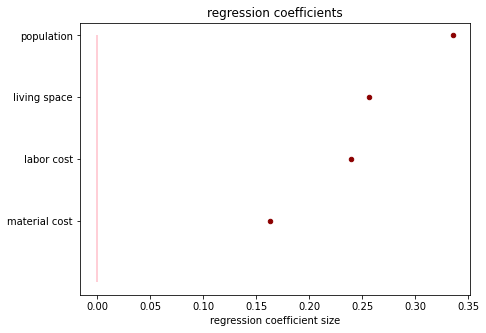

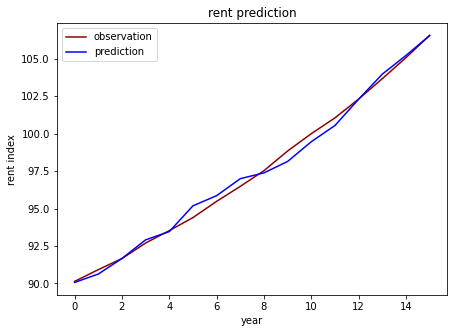

P-values per coefficient:  [4.53716456e-02 3.06941658e-05 2.71321506e-02 2.87655619e-05]
AIC:  22.608594740128435


In [5]:
feature_names = ['material cost', 'labor cost', 'living space', 'population']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

In [6]:
print(summary)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.961e+05
Date:                Fri, 04 Feb 2022   Prob (F-statistic):                    8.98e-29
Time:                        22:56:51   Log-Likelihood:                         -7.3043
No. Observations:                  16   AIC:                                      22.61
Df Residuals:                      12   BIC:                                      25.70
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Due to a the large number of features comparatively to the number of data points, the number of degrees of freedom is too low. In the following, we look at each feature separately.

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


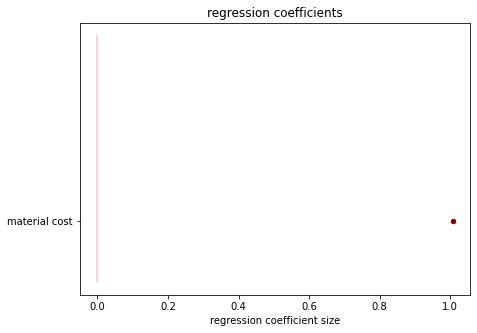

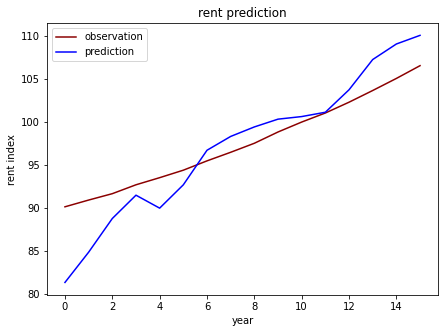

P-values per coefficient:  [4.00224951e-23]
AIC:  87.39388841181355


In [7]:
feature_names = ['material cost']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


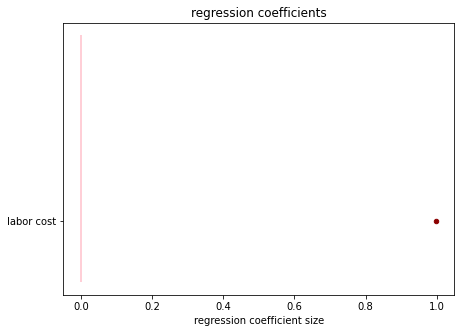

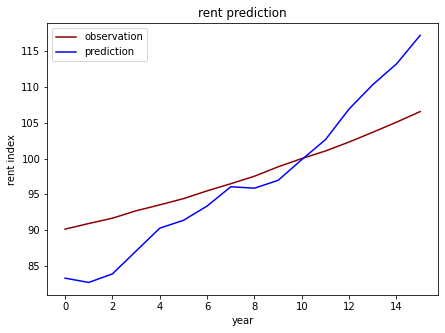

P-values per coefficient:  [3.81680888e-20]
AIC:  102.02742288128039


In [8]:
feature_names = ['labor cost']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


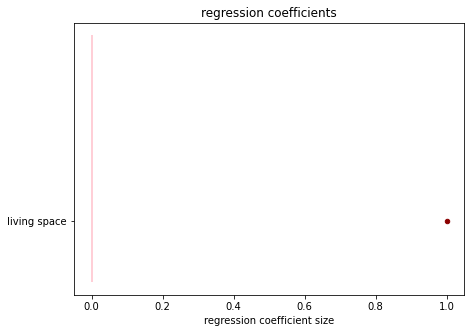

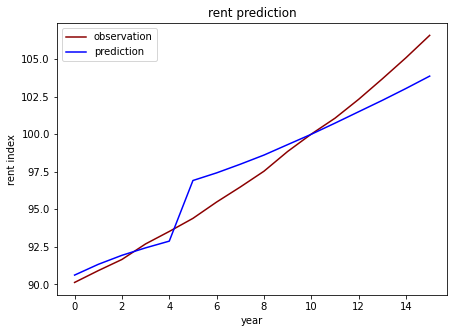

P-values per coefficient:  [2.58023882e-29]
AIC:  56.98534259493353


In [9]:
feature_names = ['living space']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

C:\Users\zopfk\miniconda3\envs\data_literacy\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


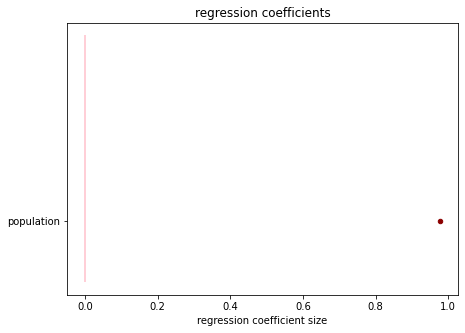

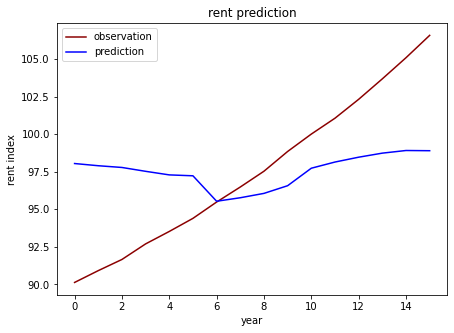

P-values per coefficient:  [3.39858417e-21]
AIC:  96.86848421958712


In [10]:
feature_names = ['population']
p_values, aic, summary = compute_regression(feature_names)
print('P-values per coefficient: ', p_values)
print('AIC: ', aic)

All coefficients lie close to 1 but none of the individual feature can predict the rent data well.  

One way to increase the data-feature ratio would be to combine features. An interesting new feature consists of an index describing the living space index per population index. 
Another possibility is increasing the number of data points. We found another rent data source dating back to 1995 and included it into exp_01.